In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
data = pd.read_csv('/content/Mall_Customers.csv')
data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


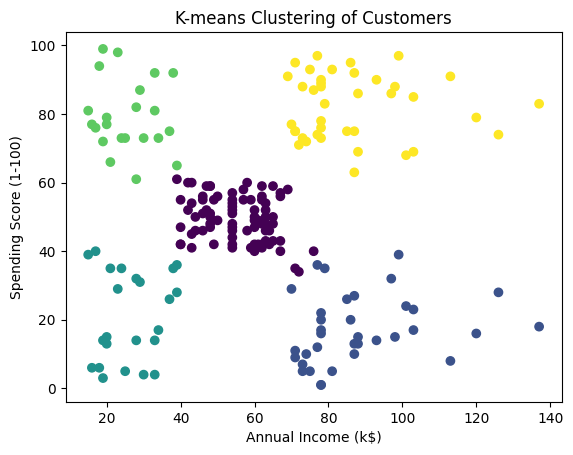

,Cluster,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,0,81,42.716049,55.296296,49.518519
1,1,35,41.114286,88.200000,17.114286
2,2,23,45.217391,26.304348,20.913043
3,3,22,25.272727,25.727273,79.363636
4,4,39,32.692308,86.538462,82.128205


Cluster Analysis:


In [3]:
#selectioing relevant feautures
features = data[['Annual Income (k$)', 'Spending Score (1-100)']]

#applying K-means Clustering algorithm
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(features)
clusters = kmeans.predict(features)
data['Cluster'] = clusters

plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means Clustering of Customers')
plt.show()

#analyzing cluster
cluster_analysis = data.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean'
}).reset_index()

print("Cluster Analysis:")
(cluster_analysis)




In [4]:
#interpreting results of clusters
print("\nInterpretation:")
for index, row in cluster_analysis.iterrows():
    cluster = row['Cluster']
    num_customers = row['CustomerID']
    mean_age = row['Age']
    mean_income = row['Annual Income (k$)']
    mean_spending_score = row['Spending Score (1-100)']

    print(f"Cluster {cluster}:")
    print(f"  - Number of Customers: {num_customers}")
    print(f"  - Mean Age: {mean_age}")
    print(f"  - Mean Annual Income: ${mean_income}k")
    print(f"  - Mean Spending Score: {mean_spending_score}")
    print()


Interpretation:
Cluster 0.0:
  - Number of Customers: 81.0
  - Mean Age: 42.71604938271605
  - Mean Annual Income: $55.2962962962963k
  - Mean Spending Score: 49.51851851851852

Cluster 1.0:
  - Number of Customers: 35.0
  - Mean Age: 41.114285714285714
  - Mean Annual Income: $88.2k
  - Mean Spending Score: 17.114285714285714

Cluster 2.0:
  - Number of Customers: 23.0
  - Mean Age: 45.21739130434783
  - Mean Annual Income: $26.304347826086957k
  - Mean Spending Score: 20.91304347826087

Cluster 3.0:
  - Number of Customers: 22.0
  - Mean Age: 25.272727272727273
  - Mean Annual Income: $25.727272727272727k
  - Mean Spending Score: 79.36363636363636

Cluster 4.0:
  - Number of Customers: 39.0
  - Mean Age: 32.69230769230769
  - Mean Annual Income: $86.53846153846153k
  - Mean Spending Score: 82.12820512820512

